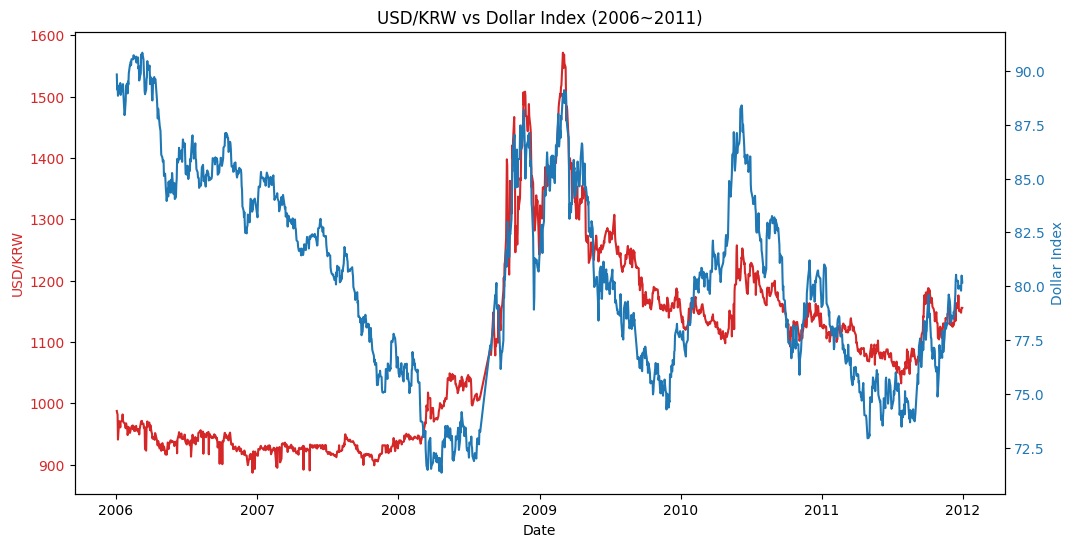

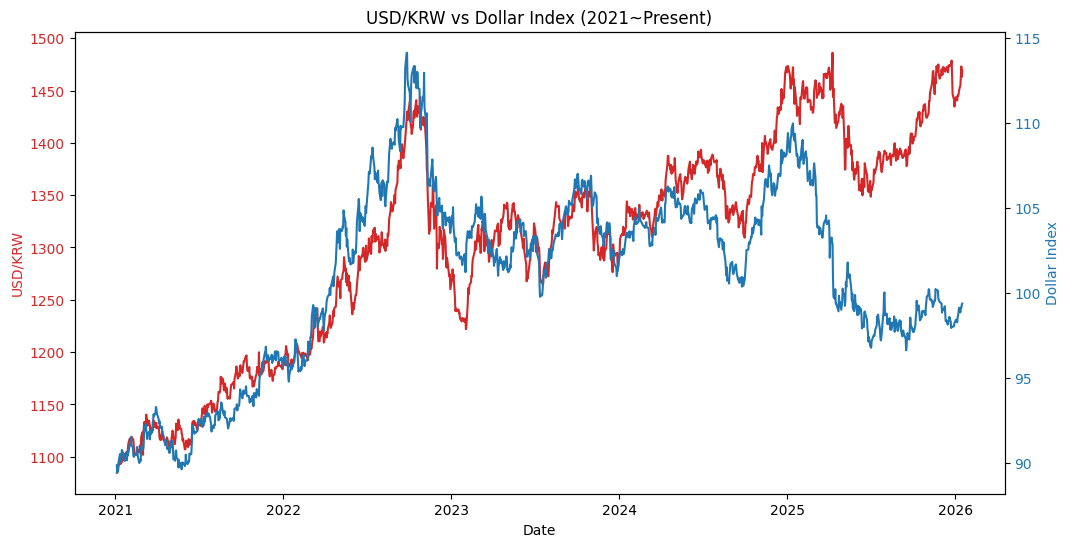

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tickers = ['KRW=X', 'DX-Y.NYB']

time_list = [['2006-01-01', '2011-12-31'], ['2021-01-01', '']]

for i in range(len(time_list)):
    start_date = time_list[i][0]
    end_date = time_list[i][1]
    
    df = yf.download(tickers, start=start_date, end=end_date if end_date else None, progress=False)['Close']

    df.columns = ['Dollar_Index', 'USD_KRW']
    df = df.dropna()

    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('USD/KRW', color=color)
    ax1.plot(df.index, df['USD_KRW'], color=color, label='USD/KRW')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Dollar Index', color=color)
    ax2.plot(df.index, df['Dollar_Index'], color=color, label='Dollar Index')
    ax2.tick_params(axis='y', labelcolor=color)

    start_year = start_date[:4]
    
    if end_date == '':
        end_year = 'Present'
    else:
        end_year = end_date[:4]

    plt.title(f'USD/KRW vs Dollar Index ({start_year}~{end_year})')
    plt.show()

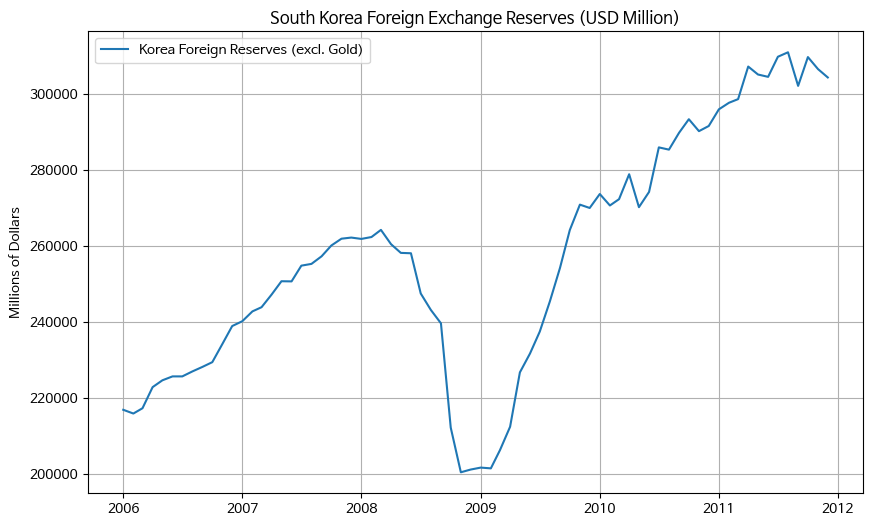

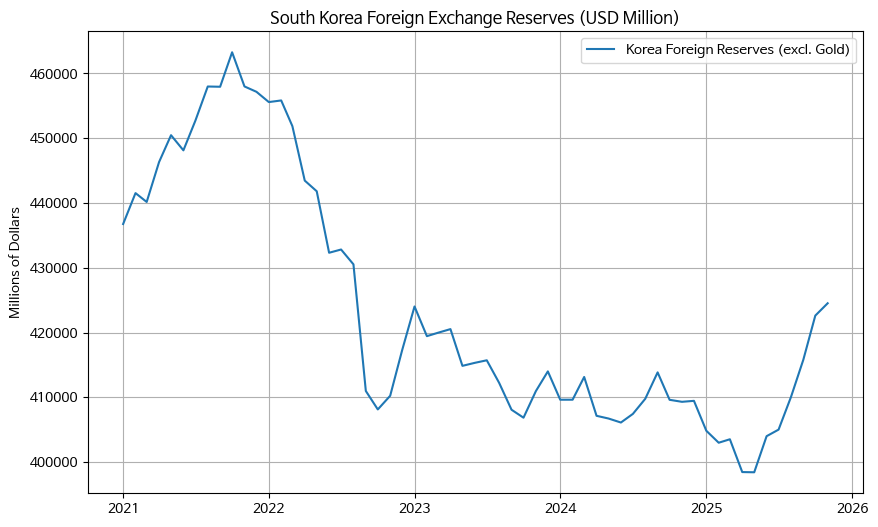

In [23]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt

df_reserves = web.DataReader('TRESEGKRM052N', 'fred', start='2020-01-01')

time_list = [['2006-01-01', '2011-12-31'],['2021-01-01', '']]

for i in range(2):
    df_reserves = web.DataReader('TRESEGKRM052N', 'fred', start = time_list[i][0], end = time_list[i][1])
    plt.figure(figsize=(10, 6))
    plt.plot(df_reserves, label='Korea Foreign Reserves (excl. Gold)')
    plt.title('South Korea Foreign Exchange Reserves (USD Million)')
    plt.ylabel('Millions of Dollars')
    plt.grid(True)
    plt.legend()
    plt.show()

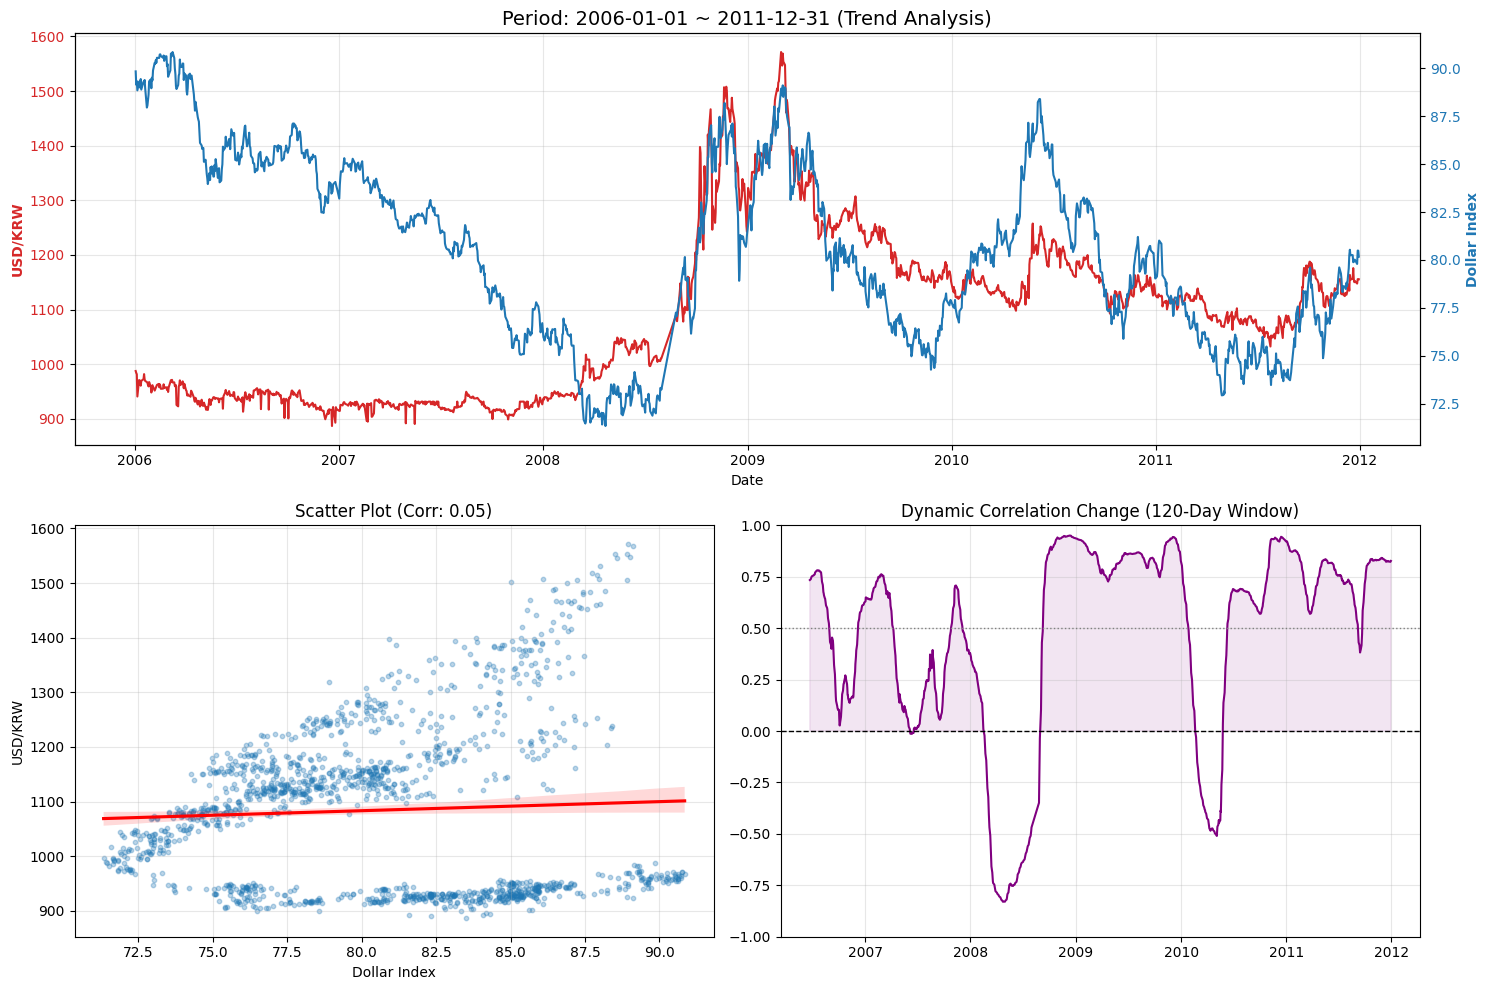

Set: 2006-01-01 ~ 2011-12-31
가격 상관계수(Level Corr): 0.0532 (장기적 추세의 유사성)
변동률 상관계수(Return Corr): 0.2260 (일일 등락의 민감도)
------------------------------------------------------------


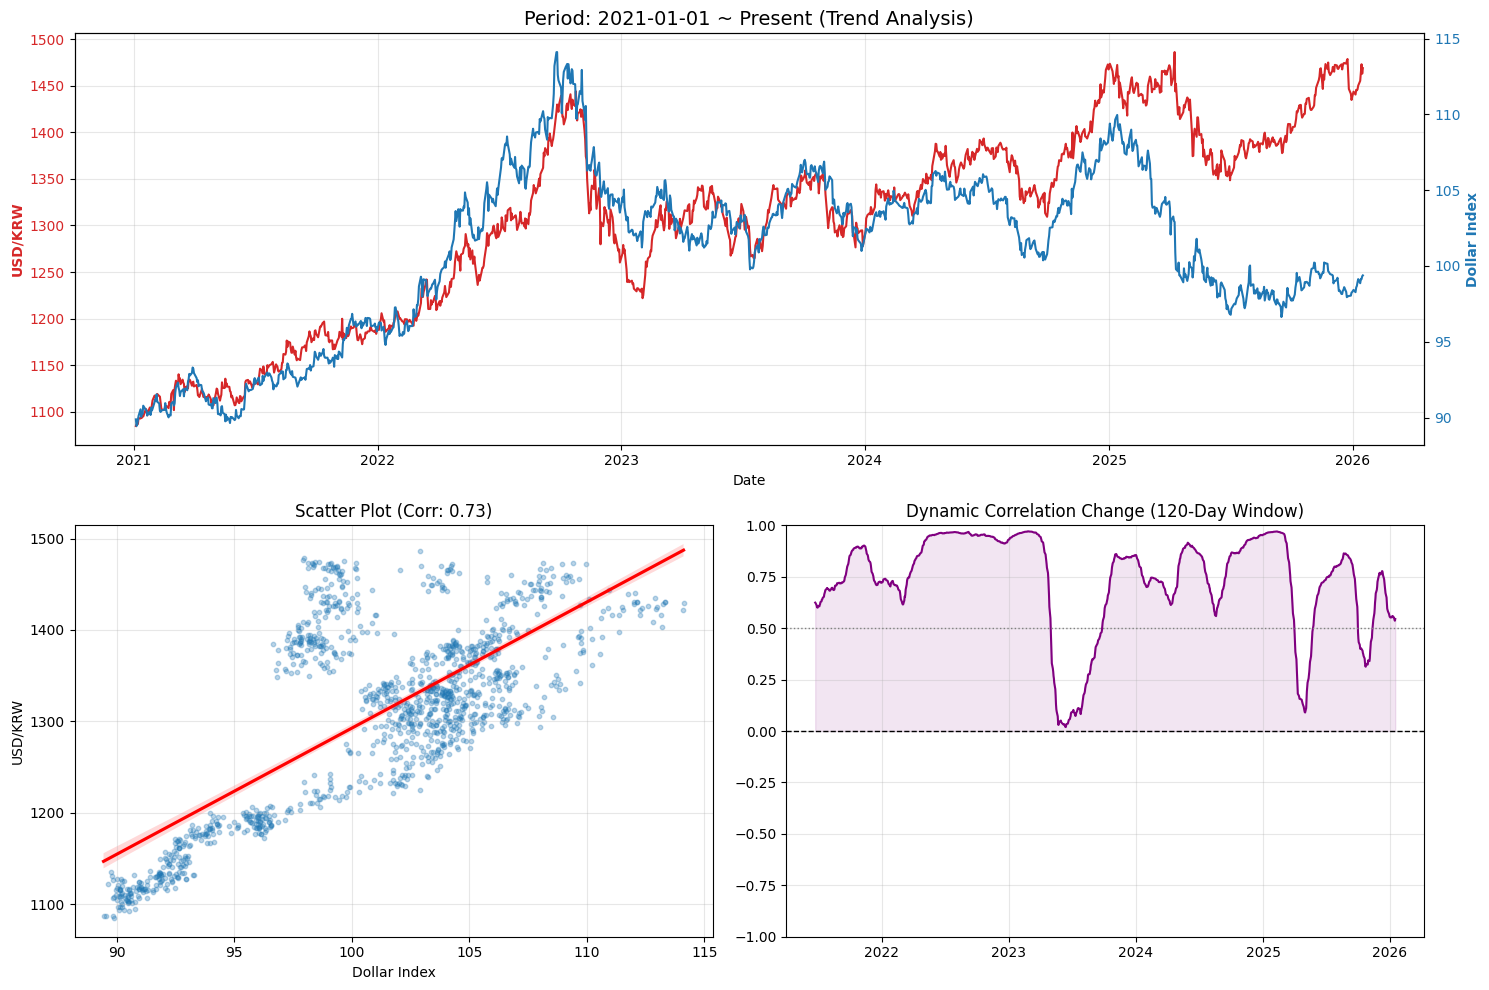

Set: 2021-01-01 ~ Present
가격 상관계수(Level Corr): 0.7278 (장기적 추세의 유사성)
변동률 상관계수(Return Corr): 0.0784 (일일 등락의 민감도)
------------------------------------------------------------


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

tickers = ['KRW=X', 'DX-Y.NYB']
time_list = [['2006-01-01', '2011-12-31'], ['2021-01-01', '']]

for i in range(len(time_list)):
    start_date = time_list[i][0]
    end_date = time_list[i][1]
    
    data_end = end_date if end_date else None
    

    df = yf.download(tickers, start=start_date, end=data_end, progress=False)['Close']
    df.columns = ['Dollar_Index', 'USD_KRW']
    df = df.dropna()

    corr_level = df['USD_KRW'].corr(df['Dollar_Index'])
    
    df_ret = df.pct_change().dropna()
    corr_ret = df_ret['USD_KRW'].corr(df_ret['Dollar_Index'])

    rolling_corr = df['USD_KRW'].rolling(window=120).corr(df['Dollar_Index'])

    fig = plt.figure(figsize=(15, 10))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

    ax1 = plt.subplot(gs[0, :])
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('USD/KRW', color=color, fontweight='bold')
    ax1.plot(df.index, df['USD_KRW'], color=color, label='USD/KRW')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, alpha=0.3)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Dollar Index', color=color, fontweight='bold')
    ax2.plot(df.index, df['Dollar_Index'], color=color, label='Dollar Index')
    ax2.tick_params(axis='y', labelcolor=color)
    
    end_title = end_date if end_date else 'Present'
    ax1.set_title(f'Period: {start_date} ~ {end_title} (Trend Analysis)', fontsize=14)

    ax3 = plt.subplot(gs[1, 0])
    sns.regplot(x=df['Dollar_Index'], y=df['USD_KRW'], ax=ax3, 
                scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})
    ax3.set_title(f'Scatter Plot (Corr: {corr_level:.2f})')
    ax3.set_xlabel('Dollar Index')
    ax3.set_ylabel('USD/KRW')
    ax3.grid(True, alpha=0.3)

    ax4 = plt.subplot(gs[1, 1])
    ax4.plot(rolling_corr.index, rolling_corr, color='purple', label='120D Rolling Corr')
    ax4.axhline(0, color='black', linestyle='--', linewidth=1)
    ax4.axhline(0.5, color='gray', linestyle=':', linewidth=1)
    ax4.set_title(f'Dynamic Correlation Change (120-Day Window)')
    ax4.set_ylim(-1.0, 1.0)
    ax4.fill_between(rolling_corr.index, 0, rolling_corr, where=(rolling_corr>0), color='purple', alpha=0.1)
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Set: {start_date} ~ {end_title}")
    print(f"가격 상관계수(Level Corr): {corr_level:.4f} (장기적 추세의 유사성)")
    print(f"변동률 상관계수(Return Corr): {corr_ret:.4f} (일일 등락의 민감도)")
    print("-" * 60)